# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> Manoela Cirne Lima de Campos </font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

In [2]:
#Abrir o arquivo
df = pd.read_csv('earthquake.csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [3]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [4]:
df.loc[(df.Latitude< 0),'Hemisferio'] = 'Sul'
df.loc[(df.Latitude> 0),'Hemisferio'] = 'Norte'
df.tail()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Hemisferio
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed,Norte
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed,Norte
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed,Norte
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed,Sul
23411,12/30/2016,20:08:28,37.3973,141.4103,Earthquake,11.94,2.2,NaN,5.5,MB,...,97.00,0.681,4.5,0.9100,US10007NTD,US,US,US,Reviewed,Norte


## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

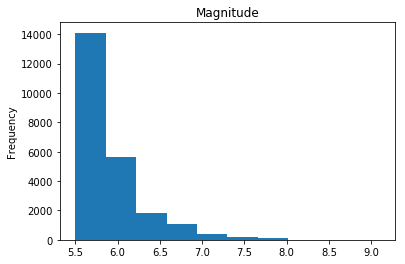

In [5]:

plot = df.Magnitude.plot.hist( title='Magnitude', alpha=1,label='M')


Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

In [6]:
from scipy.stats import *
loc,scale = expon.fit(df.Magnitude)


Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

In [7]:
plt.plot(x, expon.pdf(x, loc, scale))

plt.hist(df.Magnitude, normed = True)

x = np.arange(df.Magnitude.min(), df.Magnitude.max(), 0.1)

plt.title('pdf e histograma')


NameError: name 'x' is not defined

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [8]:
ct = pd.crosstab(df.Hemisferio, df.Type,normalize = True)
ct

Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst
Hemisferio,,,,
Norte,0.447140,0.000085,0.006279,0.000000
Sul,0.545171,0.000085,0.001196,0.000043


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

In [32]:
TF2 = len(df[(df.Hemisferio=='Norte') & (df.Type=='Earthquake')])
TF = len(df[(df.Type=='Earthquake')])
PNT = TF2/TF
PNT

0.4505853994490358

Explique o seu raciocínio

Eu selecionei apenas a intersecção de Norte e Terremoto e dividi pelo total de abalos sísmicos no hemisfério norte.

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [33]:
TF2 = len(df[(df.Hemisferio=='Norte') & (df.Type=='Nuclear Explosion')])
TF = len(df[(df.Hemisferio=='Norte')])
PEN = TF2/TF
PEN

0.013845719129697655

Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ...

## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

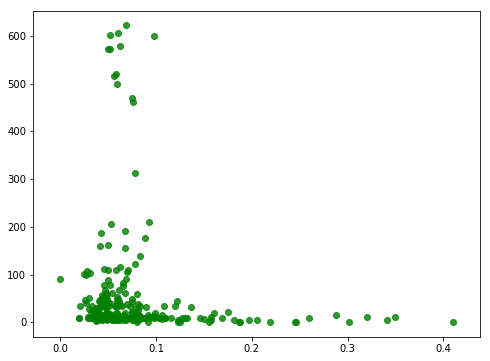

In [34]:

fig = plt.figure(figsize=(8,6))
plt.scatter(df['Magnitude Error'], df.Depth, c='green', alpha=0.8)
# plt.ylabel('Depth')
# plt.xlabel("Magnitude Error")
# plt.title("Magnitude Error e Depth")


Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [35]:
print("Correlação entre Magnitude Error e Depth:",df['Magnitude Error'].corr(df['Depth']))


Correlação entre Magnitude Error e Depth: -0.0769184389234


Explique o que significa o valor da correlação calculada acima? 

Ela mostra que elas são inversas e tem variação muito pequena.

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

In [43]:
df.Latitude.describe()

count    23412.000000
mean         1.679033
std         30.113183
min        -77.080000
25%        -18.653000
50%         -3.568500
75%         26.190750
max         86.005000
Name: Latitude, dtype: float64

In [44]:
df.Longitude.describe()

count    23412.000000
mean        39.639961
std        125.511959
min       -179.997000
25%        -76.349750
50%        103.982000
75%        145.026250
max        179.998000
Name: Longitude, dtype: float64

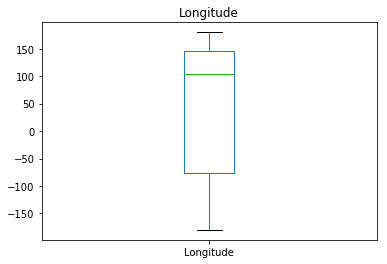

In [45]:
plot = df.Longitude.plot(kind='box',title='Longitude')#, color='red')


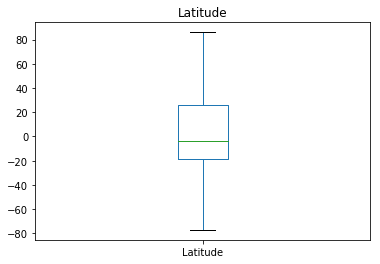

In [46]:
plot = df.Latitude.plot(kind='box',title='Latitude')#, color='red')


## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [47]:
MBNE = len(df[(df['Magnitude Type']=='MB') & (df['Type']=='Nuclear Explosion')])/len(df)


N_MB_NE = len(df[(df['Magnitude Type']=='MB') & (df['Type']=='Nuclear Explosion') & (df['Hemisferio']=='Norte')])/len(df)
PN_MB_NE = (N_MB_NE/MBNE)
PN_MB_NE



0.8282208588957055

In [41]:
S_MB_NE = len(df[(df['Magnitude Type']=='MB') & (df['Type']=='Nuclear Explosion') & (df['Hemisferio']=='Sul')])/len(df)
PS_MB_NE = (S_MB_NE/MBNE)
PS_MB_NE



0.17177914110429449

é mais provável que tenha sido no norte, pois o cálculo de probabilidade de explosão nuclear é muito maior no norte que no sul.